# Data  Preprocessing


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
# Load the dataset

data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

### Data Cleaning 

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
null_count= data.isnull().sum()
null_cols = null_count[null_count>0].index.to_list()
print(null_cols)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [17]:
null_cols.remove('LoanAmount')

#### Impuation

In [18]:
def fillna_mode(col_name):
    data[col_name].fillna(data[col_name].mode()[0],inplace=True)

for col in null_cols:
    fillna_mode(col)

C:\Users\shree\AppData\Local\Temp\ipykernel_6636\2449943491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col_name].fillna(data[col_name].mode()[0],inplace=True)


In [19]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

C:\Users\shree\AppData\Local\Temp\ipykernel_6636\4230643855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Check for outliers

<Axes: xlabel='LoanAmount'>

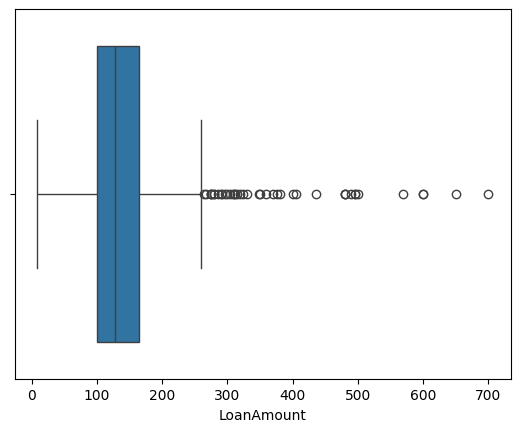

In [21]:
sns.boxplot(x = data['LoanAmount'])

In [22]:
## Removing outliers

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', ]

In [23]:
numerical_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [26]:
n = numerical_features.copy()
Q1 = data[n].quantile(0.25)
Q3 = data[n].quantile(0.75)

iqr = Q3 - Q1
data[n]  = data[n][(data[n]>=(Q1 - 1.5*iqr)) ^ (data[n]<= (Q3 + 1.5*iqr))]